In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly_converter = PolynomialFeatures(degree = 2,include_bias=False)

In [14]:
X = df.drop('sales',axis=1)
y = df['sales']

In [15]:
poly_features = poly_converter.fit_transform(X)

In [16]:
poly_features.shape

(200, 9)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
MAE = mean_absolute_error(y_test,y_pred)

In [32]:
MAE

0.5475837919149635

In [33]:
MSE = mean_squared_error(y_test,y_pred)

In [34]:
RMSE = np.sqrt(MSE)

In [35]:
RMSE

0.6784587307926907

In [37]:
train_RMSE = []
test_RMSE = []
for d in range(1,10):
    poly_converter = PolynomialFeatures(degree = d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_RMSE.append(np.sqrt(mean_squared_error(y_train,y_train_pred)))
    test_RMSE.append(np.sqrt(mean_squared_error(y_test,y_test_pred)))
    

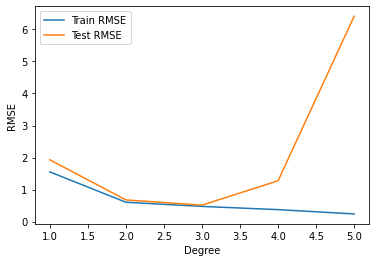

In [47]:
plt.plot(range(1,6),train_RMSE[0:5],label='Train RMSE');
plt.xlabel('Degree');
plt.ylabel('RMSE');

plt.plot(range(1,6),test_RMSE[0:5],label='Test RMSE');
plt.xlabel('Degree');
plt.ylabel('RMSE');

plt.legend();